# Practical #3: Change in vertical profiles of DIC across the globe: a visualisation analysis based on GLODAP versions 1 & 2


In [20]:
# Import libraries 

%pylab inline
import xarray as xr
from cartopy import crs as ccrs, feature as cfeature
import cmocean.cm as cmo

Populating the interactive namespace from numpy and matplotlib


## Reading netCDF file with xarray

In [2]:
# Define the path and name of the file we are studying and open it with xarray (conventially, Datasets are names: xrs)

filename = '../data/practical3_glodap_v1_v2.nc'
xrs = xr.open_dataset(filename)
xrs

<xarray.Dataset>
Dimensions:       (depth: 33, latitude: 180, longitude: 360)
Coordinates:
  * depth         (depth) float64 0.0 10.0 20.0 30.0 ... 4.5e+03 5e+03 5.5e+03
  * latitude      (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude     (longitude) float64 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Data variables:
    ta_v1         (depth, latitude, longitude) float64 ...
    dic_v1        (depth, latitude, longitude) float64 ...
    anthroCO2_v1  (depth, latitude, longitude) float64 ...
    ta_v2         (depth, latitude, longitude) float64 ...
    dic_v2        (depth, latitude, longitude) float64 ...
    anthroCO2_v2  (depth, latitude, longitude) float64 ...

## Anthropogenic CO$_{2}$ inventory 

### Convert Anthropogenic CO$_{2}$ from $\mu$mol kg$^{-1}$ to mol m$^{-3}$ (in both GLODAP v1 and v2 fields)

Assuming that 1L of seawater is 1.025 kg. <br>

---

1L = 1 dm$^3$ = 10$^{-3}$ m$^3$ <br>
So in m$^{-3}$ there is 1.025$*10^{3}$ kg$^{-1}$ of seawater.

In [3]:
antCO2_v1 = xrs.anthroCO2_v1.values*1e-6*1025
antCO2_v2 = xrs.anthroCO2_v2.values*1e-6*1025

### Calculate the column inventory of anthropogenic CO$_{2}$ (in mol m$^{-2}$)

In [4]:
# Extract the depth variable from the xarray dataset 
depth = xrs.depth.values
depth

array([   0.,   10.,   20.,   30.,   50.,   75.,  100.,  125.,  150.,
        200.,  250.,  300.,  400.,  500.,  600.,  700.,  800.,  900.,
       1000., 1100., 1200., 1300., 1400., 1500., 1750., 2000., 2500.,
       3000., 3500., 4000., 4500., 5000., 5500.])

In [15]:
# Calculating the depth difference (m) between each of the 33 levels
# Hint: you need to initiate the depth_difference variable with zeros, 
# and then need to create a "for" loop starting from index 1
depth_difference = np.zeros(shape(depth))

for d in np.arange(1,len(depth),1):
    depth_difference[d] = depth[d] - depth[d-1]

In [18]:
# Calculate the column inventory of anthropogenic CO2 in each grid cell 
# Hint: column inventory = sum of (concentration of anthropogenic CO2 * depth difference)

anthroCO2_inventory_v1 = np.ones([len(xrs.latitude), len(xrs.longitude)])
anthroCO2_inventory_v2 = np.ones([len(xrs.latitude), len(xrs.longitude)])

for i in range(len(xrs.latitude)):
    for j in range(len(xrs.longitude)):
        anthroCO2_inventory_v1[i,j] = np.nansum(antCO2_v1[:,i,j]*depth_difference)        
        anthroCO2_inventory_v2[i,j] = np.nansum(antCO2_v2[:,i,j]*depth_difference)

In [ ]:
# Note what happens when using np.nansum for an array full of NaN
np.nansum([np.nan, np.nan, np.nan])

# So what needs to happend to column inventory values that store a 0 value? 
index = anthroCO2_inventory_v1 == 0
anthroCO2_inventory_v1[index] = np.nan

index = anthroCO2_inventory_v2 == 0
anthroCO2_inventory_v2[index] = np.nan

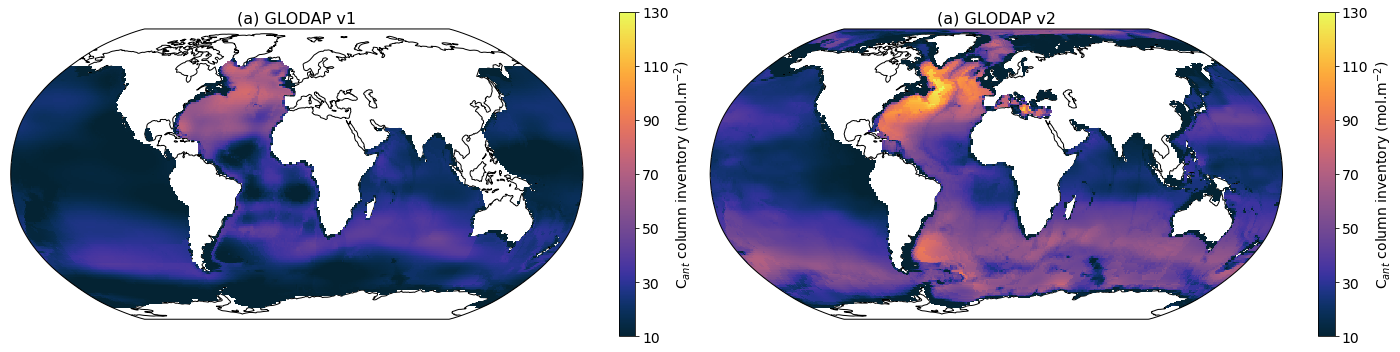

In [79]:
# Plot the column inventory results from GLODAP v1 on a left panel and from GLODAP v2 on a right panel.
# Hint: Use pcolormesh 

fig = figure(figsize=[20, 5])

# --- PLOTTING RESULTS FROM GLODAP V1
ax = fig.add_subplot(121, projection=ccrs.Robinson())

mesh = ax.pcolormesh(xrs.longitude.values, xrs.latitude.values, anthroCO2_inventory_v1, cmap=cmo.thermal, 
                     transform=ccrs.PlateCarree(), vmin=10, vmax=130)
ax.add_feature(cfeature.LAND, color='#FFFFFF') 
ax.coastlines(zorder=0)
cb = plt.colorbar(mesh, ticks=np.arange(10,140,20))
cb.set_label('C$_{ant}$ column inventory (mol.m$^{-2}$)', fontsize=14)
cb.ax.tick_params(labelsize=14)
plt.title('(a) GLODAP v1', fontsize=16)
fig.tight_layout()

# --- PLOTTING RESULTS FROM GLODAP V2
ax = fig.add_subplot(122, projection=ccrs.Robinson())

mesh = ax.pcolormesh(xrs.longitude.values, xrs.latitude.values, anthroCO2_inventory_v2, cmap=cmo.thermal, 
                     transform=ccrs.PlateCarree(), vmin=10, vmax=130)
ax.add_feature(cfeature.LAND, color='#FFFFFF') 
ax.coastlines(zorder=0)
cb = plt.colorbar(mesh, ticks=np.arange(10,140,20))
cb.set_label('C$_{ant}$ column inventory (mol.m$^{-2}$)', fontsize=14)
cb.ax.tick_params(labelsize=14)
plt.title('(a) GLODAP v2', fontsize=16)
fig.tight_layout()

plt.show()

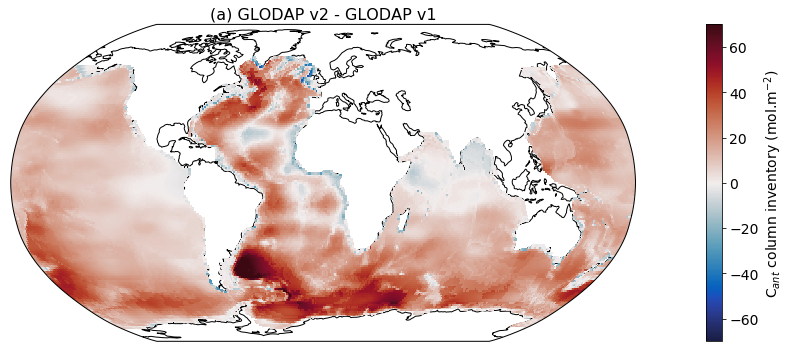

In [86]:
# Plot the difference in anthropogenic CO2 column inventory between GLODAP v1 and v2.
anthroCO2_inventory_diff = anthroCO2_inventory_v2 - anthroCO2_inventory_v1

fig = figure(figsize=[20, 5])
ax = fig.add_subplot(111, projection=ccrs.Robinson())

mesh = ax.pcolormesh(xrs.longitude.values, xrs.latitude.values, anthroCO2_inventory_diff, cmap=cmo.balance, 
                     transform=ccrs.PlateCarree(), vmin=-70, vmax=70)
ax.add_feature(cfeature.LAND, color='#FFFFFF') 
ax.coastlines(zorder=0)
cb = plt.colorbar(mesh)
cb.set_label('C$_{ant}$ column inventory (mol.m$^{-2}$)', fontsize=14)
cb.ax.tick_params(labelsize=14)
plt.title('(a) GLODAP v2 - GLODAP v1', fontsize=16)
fig.tight_layout()

plt.show()

## Global surface DIC 

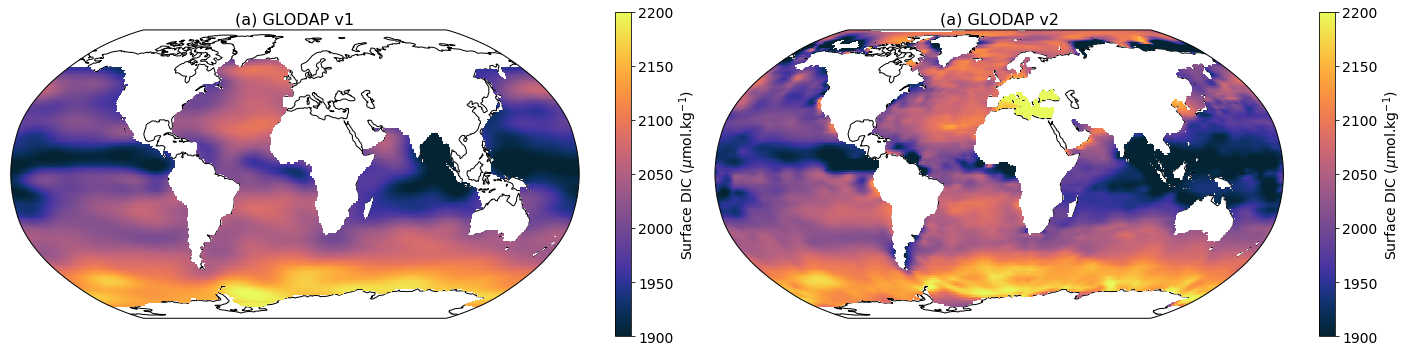

In [159]:
# Plot the global surface DIC from GLODAP v1 on a left panel and from GLODAP v2 on a right panel.

fig = figure(figsize=[20, 5])

# --- PLOTTING RESULTS FROM GLODAP V1
ax = fig.add_subplot(121, projection=ccrs.Robinson())

mesh = ax.pcolormesh(xrs.longitude.values, xrs.latitude.values, xrs.dic_v1[0], cmap=cmo.thermal, 
                     transform=ccrs.PlateCarree(), vmin=1900, vmax=2200)
ax.add_feature(cfeature.LAND, color='#FFFFFF') 
ax.coastlines(zorder=0)
cb = plt.colorbar(mesh)
cb.set_label('Surface DIC ($\mu$mol.kg$^{-1}$)', fontsize=14)
cb.ax.tick_params(labelsize=14)
plt.title('(a) GLODAP v1', fontsize=16)
fig.tight_layout()

# --- PLOTTING RESULTS FROM GLODAP V2
ax = fig.add_subplot(122, projection=ccrs.Robinson())

mesh = ax.pcolormesh(xrs.longitude.values, xrs.latitude.values, xrs.dic_v2[0], cmap=cmo.thermal, 
                     transform=ccrs.PlateCarree(), vmin=1900, vmax=2200)
ax.add_feature(cfeature.LAND, color='#FFFFFF') 
ax.coastlines(zorder=0)
cb = plt.colorbar(mesh)
cb.set_label('Surface DIC ($\mu$mol.kg$^{-1}$)', fontsize=14)
cb.ax.tick_params(labelsize=14)
plt.title('(a) GLODAP v2', fontsize=16)
fig.tight_layout()

plt.show()

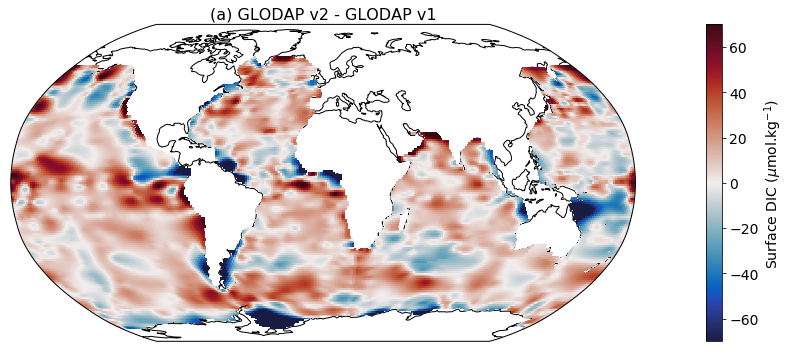

In [161]:
# Plot the difference in surface DIC concentrations between GLODAP v1 and v2.
anthroCO2_inventory_diff = anthroCO2_inventory_v2 - anthroCO2_inventory_v1

fig = figure(figsize=[20, 5])
ax = fig.add_subplot(111, projection=ccrs.Robinson())

mesh = ax.pcolormesh(xrs.longitude.values, xrs.latitude.values, xrs.dic_v2[0]-xrs.dic_v1[0], cmap=cmo.balance, 
                     transform=ccrs.PlateCarree(), vmin=-70, vmax=70)
ax.add_feature(cfeature.LAND, color='#FFFFFF') 
ax.coastlines(zorder=0)
cb = plt.colorbar(mesh)
cb.set_label('Surface DIC ($\mu$mol.kg$^{-1}$)', fontsize=14)
cb.ax.tick_params(labelsize=14)
plt.title('(a) GLODAP v2 - GLODAP v1', fontsize=16)
fig.tight_layout()

plt.show()

## DIC Profiles 

### In the Southern Ocean

latitude: below 50$^\circ$S

---
Let's do this example together!

In [153]:
# Extract DIC from GLODAP v1 and GLODAP v2 for the Southern Ocean (for all depth)
lat_extract = (xrs.latitude < 50) 

dic_v1_SO = xrs.dic_v1[:,lat_extract,:].values
dic_v2_SO = xrs.dic_v2[:,lat_extract,:].values

profile_v1 = np.empty([len(depth), np.size(dic_v1_SO,1)*np.size(dic_v1_SO,2)])
profile_v2 = np.empty([len(depth), np.size(dic_v2_SO,1)*np.size(dic_v2_SO,2)])

k=0;
for i in range(np.size(dic_v1_SO,1)):
    for j in range(np.size(dic_v1_SO,2)):
        profile_v1[:,k] = dic_v1_SO[:,i,j]
        profile_v2[:,k] = dic_v2_SO[:,i,j]
        k=k+1

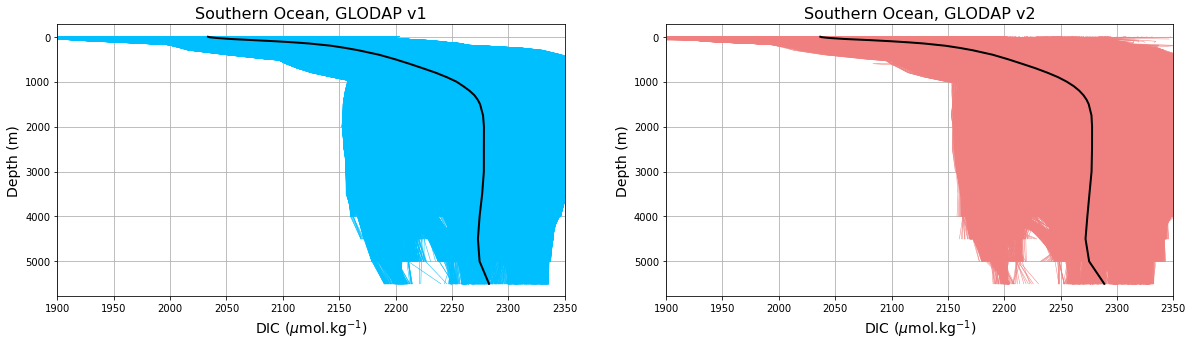

In [154]:
fig = figure(figsize=[20, 5])

# --- PLOTTING RESULTS FROM GLODAP V1
ax = fig.add_subplot(121)
plt.plot(profile_v1, depth, color='deepskyblue', linewidth=0.5)
plt.plot(np.nanmean(profile_v1,1), depth, 'k', linewidth=2)
plt.gca().invert_yaxis()
plt.title('Southern Ocean, GLODAP v1', fontsize=16)
plt.xlim([1900, 2350])
plt.grid()
plt.xlabel('DIC ($\mu$mol.kg$^{-1}$)', fontsize=14)
plt.ylabel('Depth (m)', fontsize=14)

# --- PLOTTING RESULTS FROM GLODAP V2
ax = fig.add_subplot(122)
plt.plot(profile_v2, depth, color='lightcoral', linewidth=0.5)
plt.plot(np.nanmean(profile_v2,1), depth, 'k', linewidth=2)
plt.gca().invert_yaxis()
plt.title('Southern Ocean, GLODAP v2', fontsize=16)
plt.xlim([1900, 2350])
plt.grid()
plt.xlabel('DIC ($\mu$mol.kg$^{-1}$)', fontsize=14)
plt.ylabel('Depth (m)', fontsize=14)

plt.show()

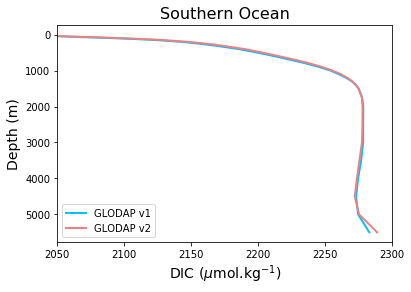

In [155]:
# Display on the same figure the mean DIC profile in the Southern Ocean from GLODAP v1 and GLODAP v2
plt.plot(np.nanmean(profile_v1,1), depth, color='deepskyblue', linewidth=2)
plt.plot(np.nanmean(profile_v2,1), depth, color='lightcoral', linewidth=2)

plt.gca().invert_yaxis()
plt.title('Southern Ocean', fontsize=16)
plt.xlim([2050, 2300])
plt.xlabel('DIC ($\mu$mol.kg$^{-1}$)', fontsize=14)
plt.ylabel('Depth (m)', fontsize=14)
plt.legend(['GLODAP v1', 'GLODAP v2'])

### In the subpolar North Atlantic

latitude: 50$^\circ$N to 70$^\circ$N <br>
longitude: -75$^\circ$E to 5$^\circ$E

---
Now your turn!

In [136]:
# Extract DIC from GLODAP v1 and GLODAP v2 for the North Atlantic (for all depth)
# Hint: be careful on using brackets for multiple if statements

lat_extract = (xrs.latitude > 50) & (xrs.latitude < 70) 
lon_extract = (xrs.longitude > -75) & (xrs.longitude < 5)

dic_v1_NA = xrs.dic_v1[:,lat_extract,lon_extract].values
dic_v2_NA = xrs.dic_v2[:,lat_extract,lon_extract].values

profile_v1 = np.empty([len(depth), np.size(dic_v1_NA,1)*np.size(dic_v1_NA,2)])
profile_v2 = np.empty([len(depth), np.size(dic_v2_NA,1)*np.size(dic_v2_NA,2)])

k=0;
for i in range(np.size(dic_v1_NA,1)):
    for j in range(np.size(dic_v1_NA,2)):
        profile_v1[:,k] = dic_v1_NA[:,i,j]
        profile_v2[:,k] = dic_v2_NA[:,i,j]
        k=k+1

/Users/alice/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/Users/alice/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: Mean of empty slice


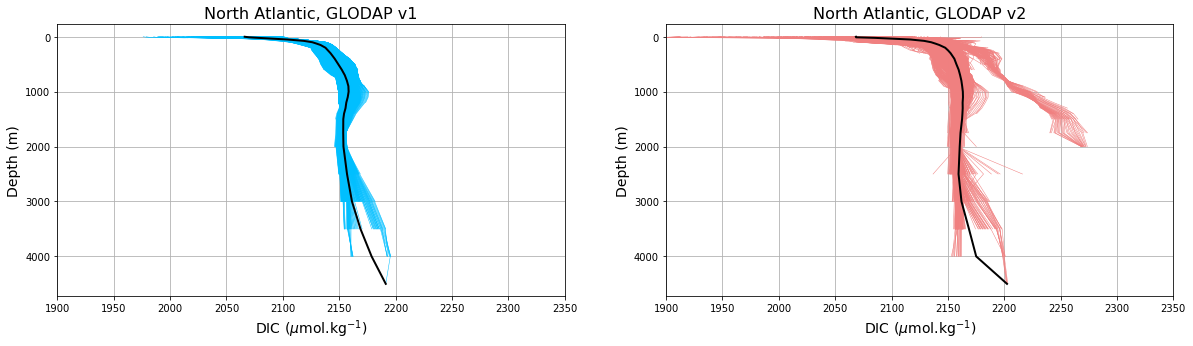

In [152]:
fig = figure(figsize=[20, 5])

# --- PLOTTING RESULTS FROM GLODAP V1
ax = fig.add_subplot(121)
plt.plot(profile_v1, depth, color='deepskyblue', linewidth=0.5)
plt.plot(np.nanmean(profile_v1,1), depth, 'k', linewidth=2)
plt.gca().invert_yaxis()
plt.title('North Atlantic, GLODAP v1', fontsize=16)
plt.xlim([1900, 2350])
plt.grid()
plt.xlabel('DIC ($\mu$mol.kg$^{-1}$)', fontsize=14)
plt.ylabel('Depth (m)', fontsize=14)

# --- PLOTTING RESULTS FROM GLODAP V2
ax = fig.add_subplot(122)
plt.plot(profile_v2, depth, color='lightcoral', linewidth=0.5)
plt.plot(np.nanmean(profile_v2,1), depth, 'k', linewidth=2)
plt.gca().invert_yaxis()
plt.title('North Atlantic, GLODAP v2', fontsize=16)
plt.xlim([1900, 2350])
plt.grid()
plt.xlabel('DIC ($\mu$mol.kg$^{-1}$)', fontsize=14)
plt.ylabel('Depth (m)', fontsize=14)

plt.show()

/Users/alice/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
/Users/alice/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


(1000, 0)

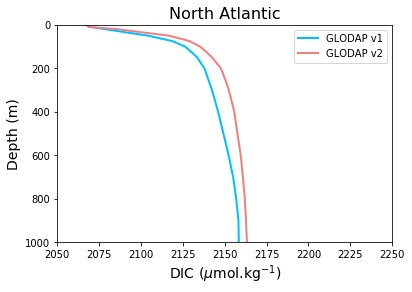

In [151]:
# Display on the same figure the mean DIC profile in the North Atlantic from GLODAP v1 and GLODAP v2
plt.plot(np.nanmean(profile_v1,1), depth, color='deepskyblue', linewidth=2)
plt.plot(np.nanmean(profile_v2,1), depth, color='lightcoral', linewidth=2)

plt.gca().invert_yaxis()
plt.title('North Atlantic', fontsize=16)
plt.xlim([2050, 2250])
plt.xlabel('DIC ($\mu$mol.kg$^{-1}$)', fontsize=14)
plt.ylabel('Depth (m)', fontsize=14)
plt.legend(['GLODAP v1', 'GLODAP v2'])